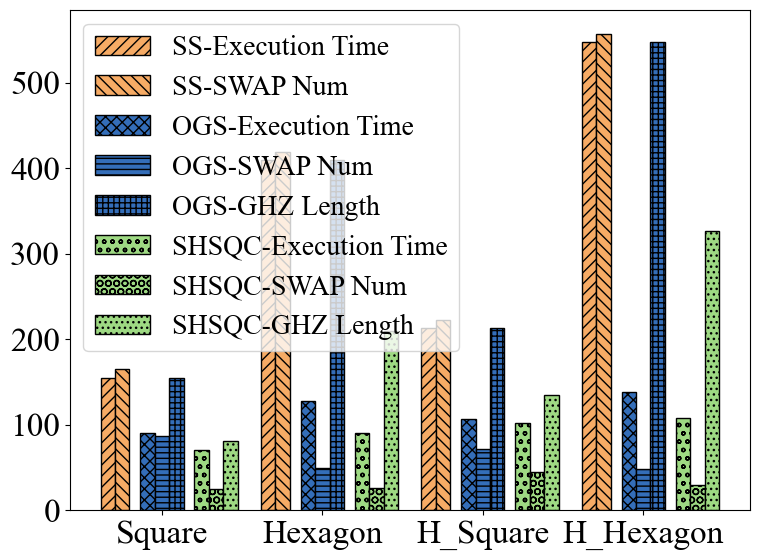

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 设置全局字体和大小
plt.rcParams.update({
    'font.size': 20,               # 字体大小为数据可视化综合规范要求
    'font.family': 'serif',        # 使用衬线字体
    'font.serif': ['Times New Roman'],  # 设置具体字体为 Times New Roman
    'svg.fonttype': 'none'         # 确保 SVG 中文字可编辑
})

x_labels = ["Square", "Hexagon", "H_Square", "H_Hexagon"]

# 数据数组定义
swap_vals = np.array([
    [155, 165, 0],
    [409, 419, 0],
    [213, 223, 0],
    [547, 557, 0],
])
greedy_vals = np.array([
    [90, 87, 155],
    [128, 50, 409],
    [107, 72, 213],
    [138, 48, 547],
])
optimal_vals = np.array([
    [70, 25, 81],
    [90, 26, 210],
    [102, 45, 135],
    [108, 30, 327],
])

# 转换为 x 位置索引
x = np.arange(len(x_labels))

# 设置每个条的宽度和偏移量
bar_width = 0.09
offsets = np.array([-3.75, -2.75, -1, 0, 1, 2.75,
                   3.75, 4.75]) * bar_width  # 条形图偏移量

# 画图
fig, ax = plt.subplots(figsize=(8, 6))

# Hatch patterns 根据需要进行调整
hatches = ['///', '\\\\\\', 'XXX', '---', '+++', 'oo', 'OO', '...']
labels = ['SS-Execution Time', 'SS-SWAP Num',
          'OGS-Execution Time', 'OGS-SWAP Num', 'OGS-GHZ Length',
          'SHSQC-Execution Time', 'SHSQC-SWAP Num', 'SHSQC-GHZ Length']

# 定义颜色 (符合数据可视化综合规范)
colors = ['#f6ab65', '#346eb9', '#9ed983']  # 分别对应 swap, greedy, optimal 的颜色

# 绘制每个系列
for i in range(8):
    vals = []
    if i < 2:
        vals = swap_vals[:, i]
        color_index = 0  # swap 使用第一种颜色
    elif i < 5:
        vals = greedy_vals[:, i-2]
        color_index = 1  # greedy 使用第二种颜色
    else:
        vals = optimal_vals[:, i-5]
        color_index = 2  # optimal 使用第三种颜色
    ax.bar(x + offsets[i], vals, width=bar_width,
           # 显式设置颜色和 alpha
           hatch=hatches[i], edgecolor='black', label=labels[i], color=colors[color_index], alpha=1.0)


# 提取 Execution Time 数据
ss_exec_time = swap_vals[:, 0]         # SS-Execution Time
ogs_exec_time = greedy_vals[:, 0]      # OGS-Execution Time
shsqc_exec_time = optimal_vals[:, 0]   # SHSQC-Execution Time

# 绘制折线
# ax.plot(x + offsets[0], ss_exec_time, color='#f6ab65',
#         marker='o', markersize=8, linestyle='-', linewidth=2)
# ax.plot(x + offsets[2], ogs_exec_time, color='#346eb9',
#         marker='o', markersize=8, linestyle='-', linewidth=2)
# ax.plot(x + offsets[5], shsqc_exec_time, color='#9ed983',
#         marker='o', markersize=8, linestyle='-', linewidth=2)


# 设置 x 轴
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
# ax.set_xlabel('Chiplet Components', fontsize=24)
ax.set_ylabel('')
ax.set_title('')
ax.legend()

ax.tick_params(axis='both', which='major', labelsize=24)

plt.tight_layout()
plt.savefig('./fig/chiplet_type_bv.pdf', format='pdf')  # 导出为 SVG 格式
plt.show()